In [1]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [4]:
FIG_SIZE = (15,10)

In [6]:
file = "C:\\Users\\Rahul\\Downloads\\4.wav"

In [18]:
# load audio file with Librosa
signal, sample_rate = librosa.load(file, sr=22050)

sample_rate

22050

In [13]:

# FFT -> power spectrum
# perform Fourier transform
fft = np.fft.fft(signal)
fft



array([-0.17727109-1.27675648e-15j,  0.11646924-3.17700860e-01j,
        0.57327655-5.05351942e-01j, ...,  0.80711346+1.07919573e-01j,
        0.57327655+5.05351942e-01j,  0.11646924+3.17700860e-01j])

In [19]:

# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)


# create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))


Text(0.5, 1.0, 'Power spectrum')

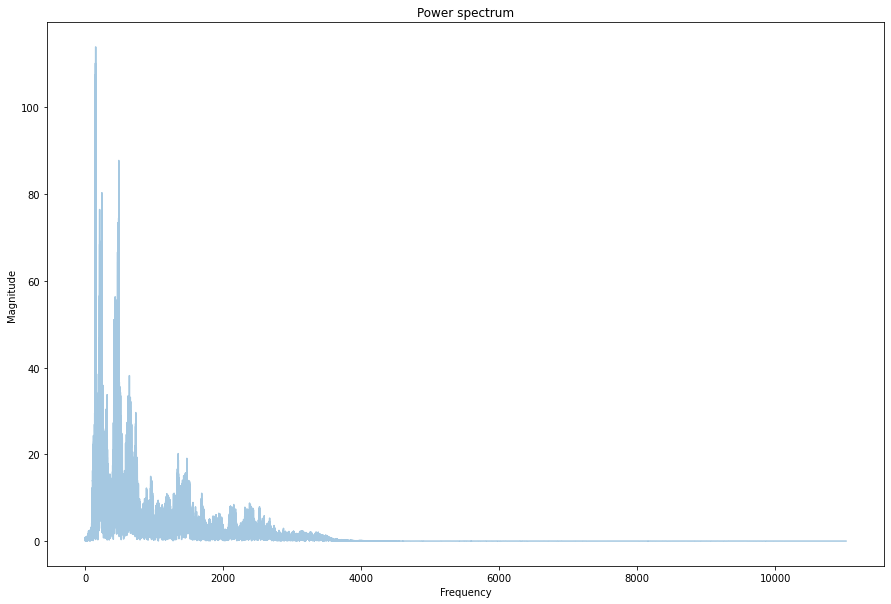

In [23]:
# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

# plot spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")



In [24]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))


STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

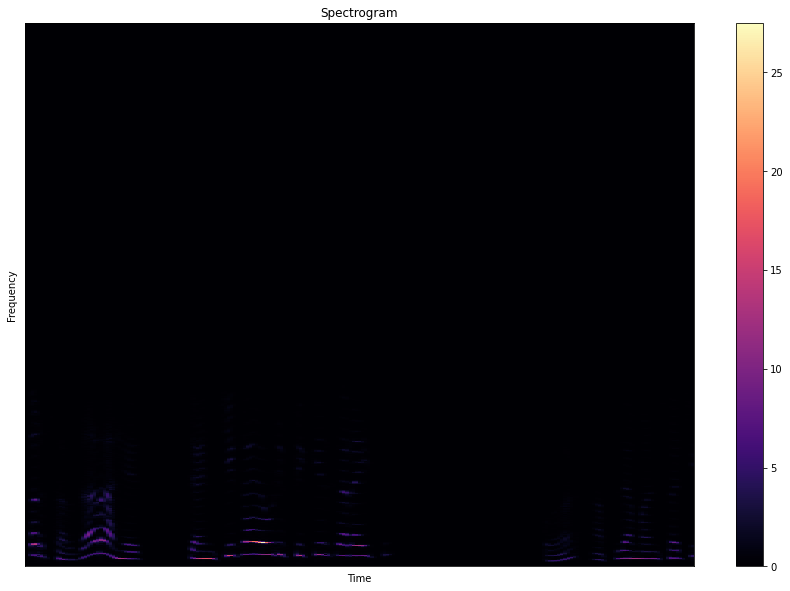

In [26]:
# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")



Text(0.5, 1.0, 'Spectrogram (dB)')

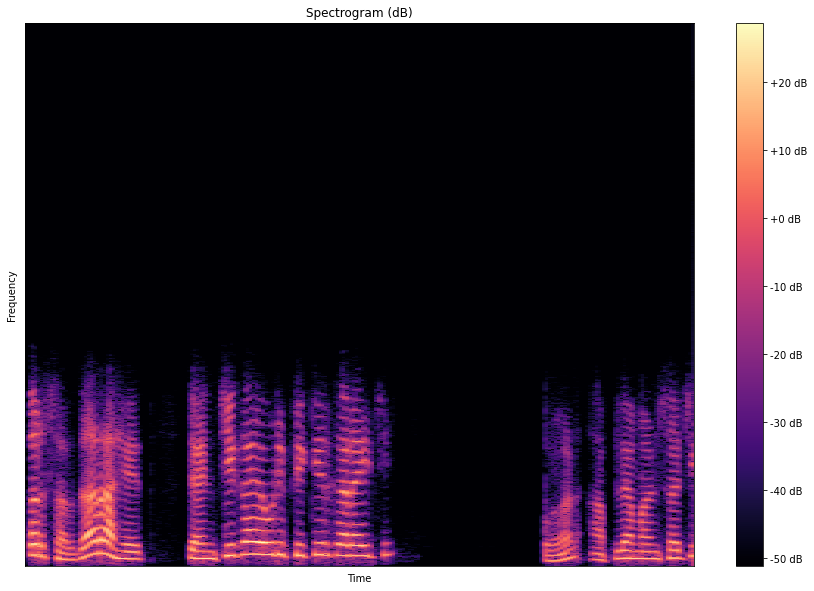

In [28]:
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")




C:\Users\Rahul\AppData\Local\Temp\ipykernel_25196\1264290234.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00038133  0.00454663
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)


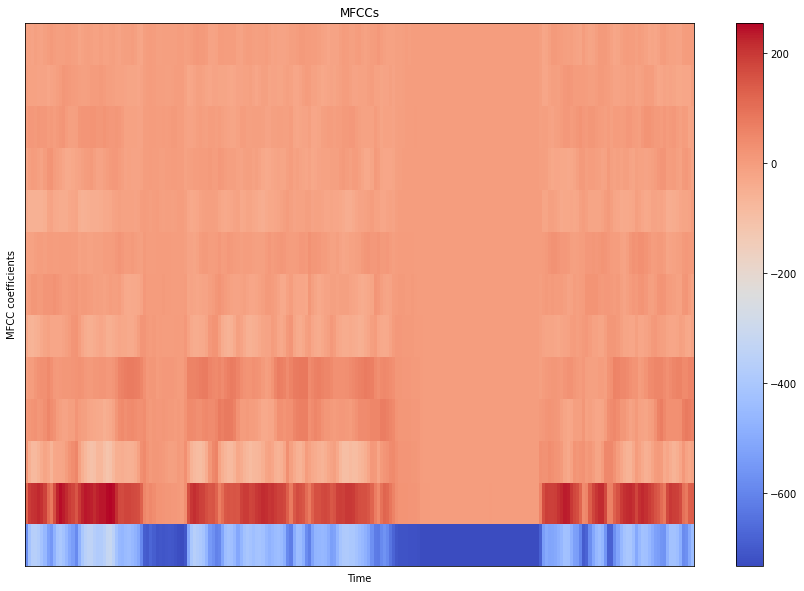

In [29]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()
